# Aufgabe 03

In [6]:
# Install dependencies
!pip install networkx pygraphviz matplotlib

In [7]:
import os
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import to_agraph
from IPython.display import Image

# Ensure the assets directory exists
os.makedirs('assets', exist_ok=True)

prefix = "aufgabe_03"

## Create the graph

In [8]:
edges = [(1, 2), (2, 3), (3, 4), (2, 4), (2, 5), (5, 6), (5, 7), (7, 8), (6, 8), (6, 1)]

# Step 1: Create a graph
g = nx.Graph()
g.add_edges_from(edges)

# Step 2: Convert to AGraph (Graphviz graph)
a = to_agraph(g)

## Find all walks in the graph

In [9]:
ways = list(nx.all_simple_paths(g, source=1, target=8))

# Visualize the results

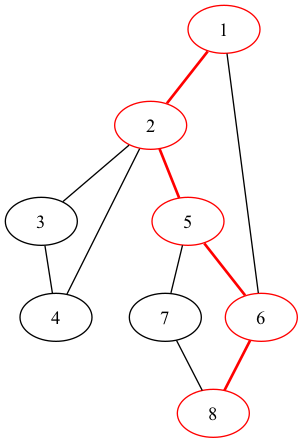

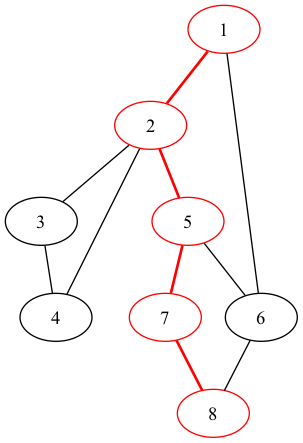

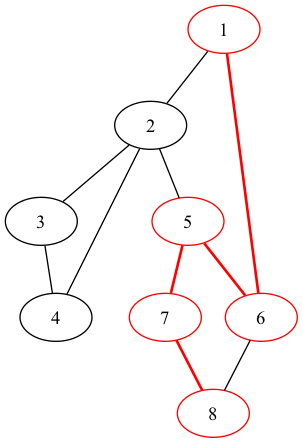

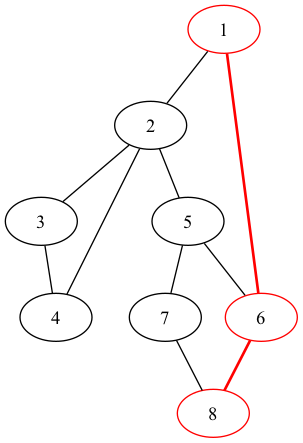

In [10]:
for idx, way in enumerate(ways, 1):
    # Create a new AGraph from the NetworkX graph
    a = to_agraph(g)

    # Default style for all edges
    for edge in a.edges():
        edge.attr['color'] = 'black'
        edge.attr['style'] = 'solid'

    # Highlight the edges in the path
    path_edges = list(zip(way[:-1], way[1:]))
    for edge in path_edges:
        if a.has_edge(edge[0], edge[1]):
            a.get_edge(edge[0], edge[1]).attr['color'] = 'red'
            a.get_edge(edge[0], edge[1]).attr['style'] = 'bold'
        for i in range(0, len(edge)):
            if a.has_node(edge[i]):
                a.get_node(edge[i]).attr['color'] = 'red'

    # Draw the graph with highlighted path
    a.layout(prog='dot')  # Use dot algo for layout
    png_path = f'assets/{prefix}_graph_path_{way[0]}_to_{way[-1]}_{idx}.png'
    a.draw(png_path)
    display(Image(filename=png_path))


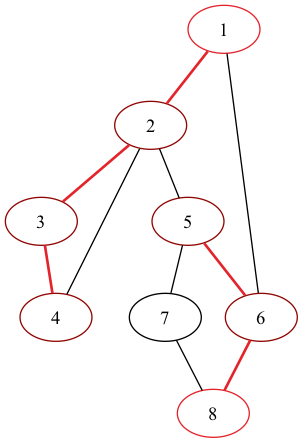

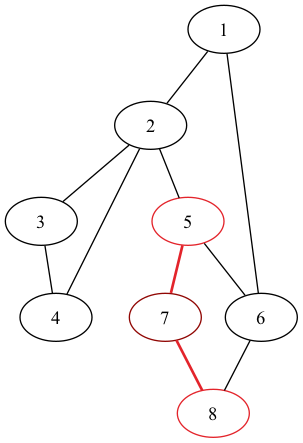

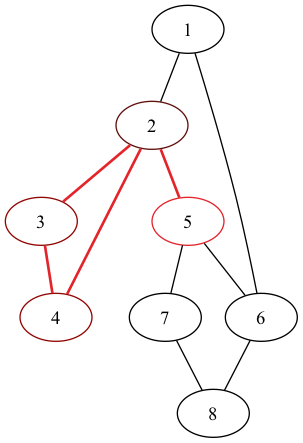

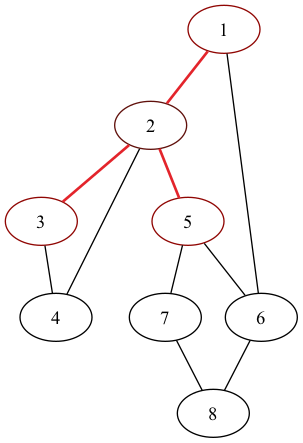

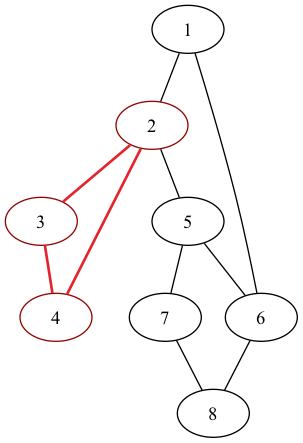

In [27]:
walks = list()
walks.append([1, 2, 3, 4, 5, 6, 8])
walks.append([5, 7, 8])
walks.append([2, 3, 4, 2, 5])
walks.append([1, 2, 3, 2, 5, 2, 1])
walks.append([3, 4, 2, 3])

# Define color gradient from light to dark
colors = ['#E3242B', '#900603', '#60100B']  # Light red to dark red


# Update visit counters and set color attributes
for idx, walk in enumerate(walks):
    # Initialize visit counters
    # Step 1: Create a graph
    g = nx.Graph()
    g.add_edges_from(edges)

    # Step 2: Convert to AGraph (Graphviz graph)
    a = to_agraph(g)

    # Initialize visit counters
    edge_visits = {}
    node_visits = {}

    # Process the walk
    path_edges = list(zip(walk[:-1], walk[1:]))
    for edge in path_edges:
        if edge in edge_visits:
            edge_visits[edge] += 1
        else:
            edge_visits[edge] = 1
        edge_visits[edge] = min(edge_visits[edge], len(colors))  # Cap the visits at the max color index

        if a.has_edge(edge[0], edge[1]):
            color_index = edge_visits[edge] - 1
            a.get_edge(edge[0], edge[1]).attr['color'] = colors[color_index]
            a.get_edge(edge[0], edge[1]).attr['style'] = 'bold'

        for node in edge:
            if node in node_visits:
                node_visits[node] += 1
            else:
                node_visits[node] = 1
            node_visits[node] = min(node_visits[node], len(colors))  # Cap the visits at the max color index

            if a.has_node(node):
                color_index = node_visits[node] - 1
                a.get_node(node).attr['color'] = colors[color_index]

    filepath = f"assets/{prefix}_walk_{idx}.png"
    a.draw(filepath, format='png', prog='dot')
    display(Image(filepath))

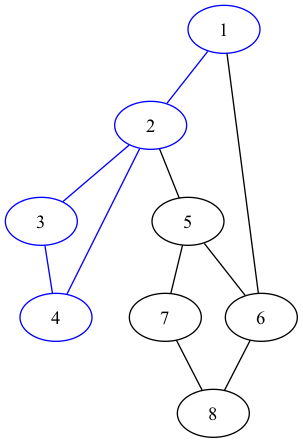

In [21]:
import itertools

graph = g.copy()
a = to_agraph(graph)
for node in [1, 2, 3, 4]:
    if a.has_node(node):
        a.get_node(node).attr['color'] = 'blue'
        
for node1, node2 in itertools.combinations(W6_nodes, 2):
    if a.has_edge(node1, node2):
        a.get_edge(node1, node2).attr['color'] = 'blue'

filepath = f"assets/{prefix}_walk_6.png"
a.draw(filepath, format='png', prog='dot')
display(Image(filepath))
